In [ ]:
import pandas as pd

# read file

df=pd.read_csv("cust_satisfaction.csv")

#tasks :  predict customer type

df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.head()
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
Index: 103422 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103422 non-null  object 
 1   Customer Type               103422 non-null  object 
 2   Type of Travel              103422 non-null  object 
 3   Class                       103422 non-null  object 
 4   satisfaction                103422 non-null  object 
 5   Age                         103422 non-null  int64  
 6   Flight Distance             103422 non-null  int64  
 7   Inflight entertainment      103422 non-null  int64  
 8   Baggage handling            103422 non-null  int64  
 9   Cleanliness                 103422 non-null  int64  
 10  Departure Delay in Minutes  103422 non-null  int64  
 11  Arrival Delay in Minutes    103422 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 10.3+ MB


Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction',
       'Age', 'Flight Distance', 'Inflight entertainment', 'Baggage handling',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [ ]:
#encoding of data

df.columns

#encoding of object type of data

print(df['Gender'].unique())

df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
df['Type of Travel'] = df['Type of Travel'].map({'Business travel':1, 'Personal Travel':0})
df['Class'] = df['Class'].map({'Business':1, 'Eco':2, 'Eco Plus':3})
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0, 'satisfied':1})

df



['Male' 'Female']


,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,0,3,0,13,460,5,4,5,25,18.0
1,1,0,1,1,0,25,235,1,3,1,1,6.0
2,0,1,1,1,1,26,1142,5,4,5,0,0.0
3,0,1,1,1,0,25,562,2,3,2,11,9.0
4,1,1,1,1,1,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,0,1,2,0,23,192,2,4,2,3,0.0
103900,1,1,1,1,1,49,2347,5,5,4,0,0.0
103901,1,0,1,1,0,30,1995,4,4,4,7,14.0
103902,0,0,1,2,0,22,1000,1,1,1,0,0.0


In [ ]:
print("indexing value  :  " ,df['Customer Type'].value_counts().index) #key or index same

indexing=list( df['Customer Type'].value_counts().keys())
print(indexing)
value=list(df['Customer Type'].value_counts().values)
print(value)




#bdata nt balanced



indexing value  :   Index([1, 0], dtype='int64', name='Customer Type')
[1, 0]
[np.int64(84517), np.int64(18905)]


C:\Users\Dell\AppData\Local\Temp\ipykernel_7032\3945270128.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.catplot(x=indexing,y=value,kind="bar",palette=['red','blue'])


Text(-12.430555555555555, 0.5, 'value')

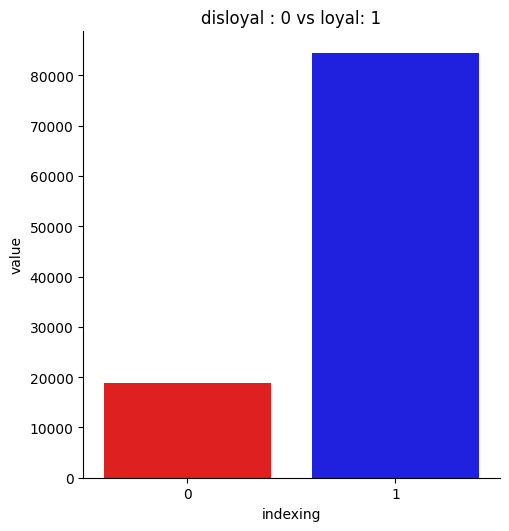

In [ ]:
#creating catplot for this 

import seaborn as sbn
import matplotlib.pyplot as plt

sbn.catplot(x=indexing,y=value,kind="bar",palette=['red','blue'])
plt.title("disloyal : 0 vs loyal: 1")
plt.xlabel("indexing")
plt.ylabel("value")

#data is not balanced here




C:\Users\Dell\AppData\Local\Temp\ipykernel_7032\661394572.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.catplot(x=indexing,y=value,kind="bar",palette=['red','blue'])


Text(-12.430555555555555, 0.5, 'value')

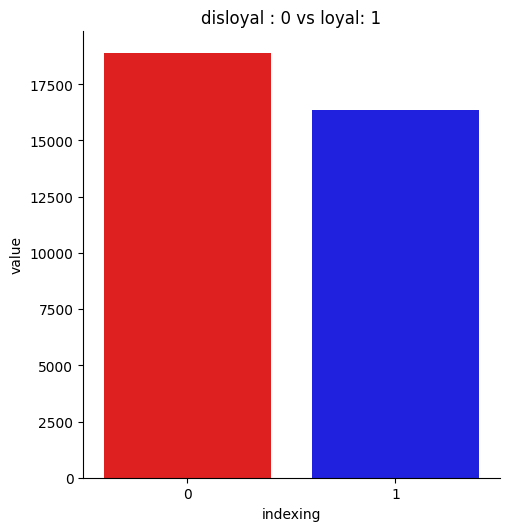

In [ ]:


loyal =df[df['Customer Type']==1].loc[0:20000]
disloyal= df[df['Customer Type']==0]

df=pd.concat([loyal,disloyal])

indexing=list( df['Customer Type'].value_counts().keys())
value=list(df['Customer Type'].value_counts().values)

import seaborn as sbn
import matplotlib.pyplot as plt

sbn.catplot(x=indexing,y=value,kind="bar",palette=['red','blue'])
plt.title("disloyal : 0 vs loyal: 1")
plt.xlabel("indexing")
plt.ylabel("value")




In [ ]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,0,3,0,13,460,5,4,5,25,18.0
2,0,1,1,1,1,26,1142,5,4,5,0,0.0
3,0,1,1,1,0,25,562,2,3,2,11,9.0
4,1,1,1,1,1,61,214,3,4,3,0,0.0
5,0,1,0,2,0,26,1180,1,4,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103892,0,0,1,1,0,37,596,3,3,3,110,121.0
103895,0,0,1,2,0,24,1055,1,5,1,13,10.0
103899,0,0,1,2,0,23,192,2,4,2,3,0.0
103901,1,0,1,1,0,30,1995,4,4,4,7,14.0


In [ ]:
loyal =df[df['Customer Type']==1].loc[0:20000]
disloyal= df[df['Customer Type']==0]


C:\Users\Dell\AppData\Local\Temp\ipykernel_7032\2392144601.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.catplot(x=indexing,y=value,kind="bar",palette=['red','blue'])


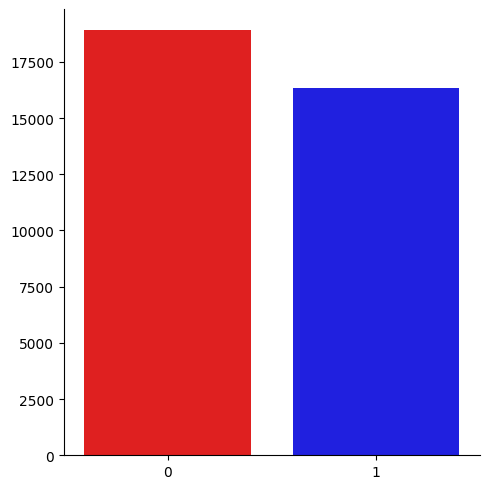

In [ ]:
indexing=list( df['Customer Type'].value_counts().keys())
value=list(df['Customer Type'].value_counts().values)

import seaborn as sbn
import matplotlib.pyplot as plt

sbn.catplot(x=indexing,y=value,kind="bar",palette=['red','blue'])

In [ ]:
#splitting data

from sklearn.model_selection import train_test_split

x=df.drop('Customer Type', axis=1) #independent
y=df['Customer Type'] #dependent


x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=42,train_size=0.2)

x_train.shape,y_train.shape,y_test.shape,x_test.shape


((28191, 11), (28191,), (7048,), (7048, 11))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

obj=RandomForestClassifier()

obj.fit(x_train,y_train)



,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
print(obj.score(x_train,y_train))
#accuracy of the system increases after balancing the data 90  --> 99
pred= obj.predict(x_test)
pred
pred.dtype


0.9998935830584229


dtype('int64')

In [ ]:
y_test
y_test.dtype

dtype('int64')

In [ ]:
#doing dl part

import tensorflow as tf 

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
#layers  will be inside a container  called model
#types:

# 1. sequential

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

# dense have all 3 layers - input, output and hidden

model=Sequential()

In [ ]:
# adding layer to model


#input layer

# input dim is rqual to independt feature of data
# x= indep values therefore x.shape[1] ==input dim


In [ ]:
#creating hidden layer

# units=node in layer


input_shape=x.shape[1]
model.add(Dense(units=64,activation='relu',input_dim=input_shape))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=8,activation='relu'))



d:\aimlworkshop\dl\ANN\cust\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#output layer
# we need bianry result
#binary problm therefore need 1 output yes/no

model.add(Dense(units=1,activation='sigmoid'))

# //forward propogation 
# backword prop minimise loss and increase effeciency
#update wt and bias value
# we have optimisers : used to update the parameters (wt,bias) of a neural network during training.  
#we have 11 optimisers - main is adam
#here loss is binary cross as on binary data working 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# shape+1*layers=total params


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,577 (17.88 KB)

 Trainable params: 4,577 (17.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#epoch  iput output back probp

history=model.fit(x_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
881/881 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6400 - loss: 0.7521
Epoch 2/5
881/881 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7215 - loss: 0.5773
Epoch 3/5
881/881 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7752 - loss: 0.4879
Epoch 4/5
881/881 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8098 - loss: 0.4347
Epoch 5/5
881/881 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8360 - loss: 0.3972


In [ ]:
data=pd.DataFrame(history.history)
data


,accuracy,loss
0,0.640027,0.752101
1,0.721507,0.577295
2,0.775247,0.487862
3,0.809762,0.434676
4,0.835976,0.397184


In [ ]:
pred=model.predict(x_test)
# pred
#fiding threshold
pred=(pred>0.5).astype(int).ravel() #covert 2 d to 1 d
# pred
pred=pd.DataFrame(pred)
pred



221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,0
0,1
1,0
2,1
3,1
4,0
...,...
7043,1
7044,1
7045,1
7046,0


In [ ]:
y_test[0:10]

17419    1
26243    0
18681    1
9422     1
72096    0
7775     1
55934    0
43309    0
10848    1
11214    1
Name: Customer Type, dtype: int64

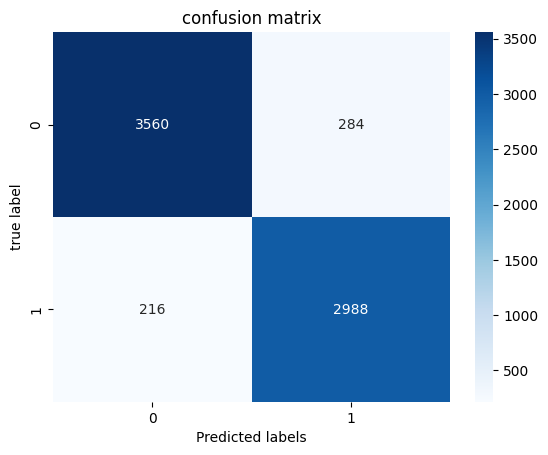

In [ ]:
#mode evalution - b confusion matric - in classification used

from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm=confusion_matrix(pred,y_test)

sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title('confusion matrix')
plt.xlabel('Predicted labels')
plt.ylabel('true label')
plt.show()

#in the diagram false positive is 284 . now we need to minimse this



In [ ]:
print(classification_report(pred,y_test))


              precision    recall  f1-score   support

           0       0.94      0.93      0.93      3844
           1       0.91      0.93      0.92      3204

    accuracy                           0.93      7048
   macro avg       0.93      0.93      0.93      7048
weighted avg       0.93      0.93      0.93      7048

